### 0. Setup

In [1]:
# YOLO v5
# !git clone https://github.com/ultralytics/yolov5

In [1]:
import os
import time
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

from sklearn.metrics import confusion_matrix

import cv2
import torch
import torchvision

### 1. YOLO V5
![YOLO_V5](https://github.com/ultralytics/yolov5/releases/download/v1.0/model_plot.png)

In [2]:
model_yolo_v5 = torch.hub.load("ultralytics/yolov5", "yolov5m")

Using cache found in C:\Users\spec3/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-25 Python-3.9.15 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


### 2. Detections
#### 2-1. Detections Test

In [16]:
img = "https://i.ytimg.com/vi/xEWjXUYhsCE/maxresdefault.jpg"

results = model_yolo_v5(img)
results.print()

image 1/1: 720x1280 16 persons, 1 backpack
Speed: 272.8ms pre-process, 11.5ms inference, 2.5ms NMS per image at shape (1, 3, 384, 640)


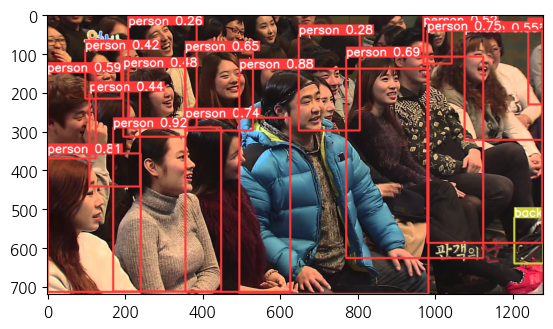

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### 2-2. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0) # webcam or connected cam
# cap = cv2.VideoCapture(PATH) # Loaded video

thr = 0.5 # 검출 정확도
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model_yolo_v5(frame)
    cv2.imshow("Detection", np.squeeze(results.render()))
    # 라벨 출력
    labels = results.pandas().xyxy[0]
    detect_labels = labels[labels["confidence"]>thr]["name"]
    print(detect_labels.tolist())
    
    if cv2.waitKey(10)&0xFF==ord("q"): break
    
cap.release()
cv2.destroyAllWindows()

### 3. Fine Tuning

In [ ]:
!python train.py --img 320 --batch 32 --

### 4. Real Time Test